# T1 V1
### Understanding of the Basics of Logistic Regression : Part 1

- Classification Algorithm
     * Logistic Regression
    

- In classification problems, a categorical target variable is used
- A categorical varriable is one which represents a characteristic which cannot be measured or counted

- Q. If logistic regression is a classification algorithm, then why is there the term "regression" in its name?
    * Predicting continuous probability values between 0 and 1 - Regression
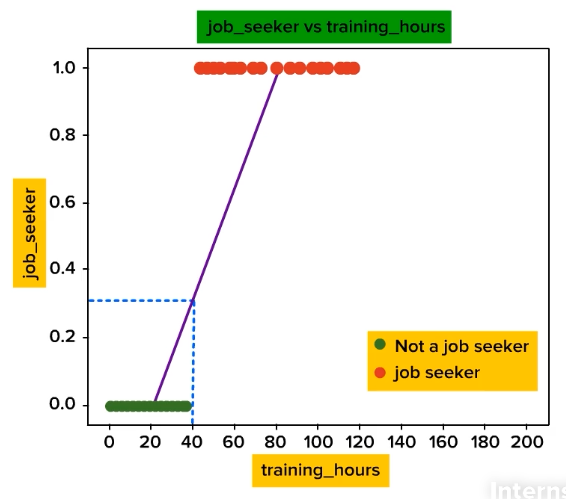

- Why do we need logistic regression?
    * Using linear regression in this case actually poses two issues:
        * Suseptible to the outliers
            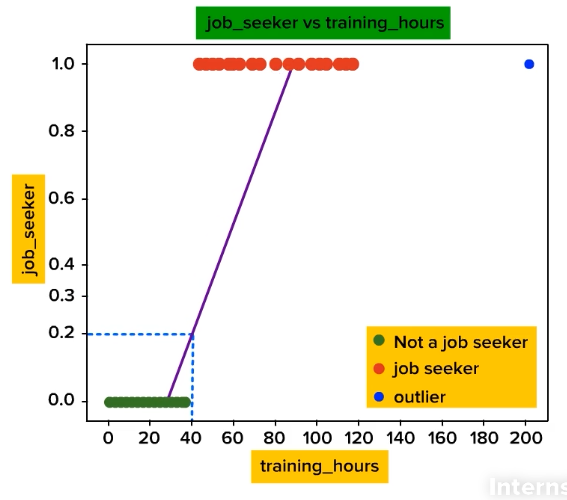
        * Interpretation of the model
            1. in the former case: tranining_hours = 0, predicted value ~ -0.1
            2. in the later case: training_hours = 100, predicted value ~ 1.3

# T1 V2
### Understanding of the Basics of Logistic Regression : Part 2

- Having a negative value or a value > 1 is meaningless
    * If you are a job seeker : Class 1 <-- Upper Limit
    * If you are not a job seeker : Class 0 <-- Lower Limit
    * We can work with probabilities between 0 and 1

- The logit function (sigmoid function):
    * A function which has a range beteen 0 and 1 (0 and 1 exclusive), irrespective of any input, it will always give output between 0 and 1
    * It is given as:
        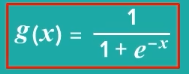

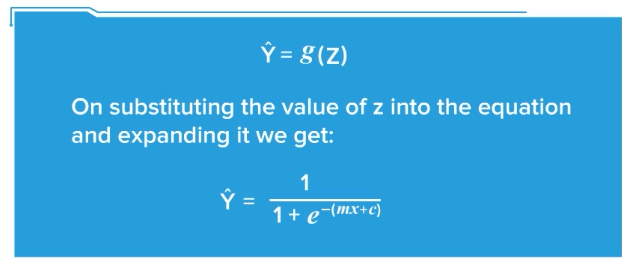

- If Z (i.e. mx + c) is very large positive value, then:
    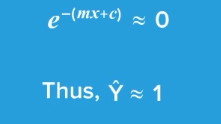

- If Z(i.e. mx + c) is very large negative value, then:
    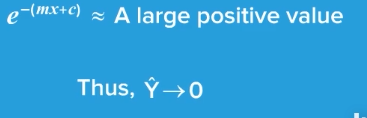

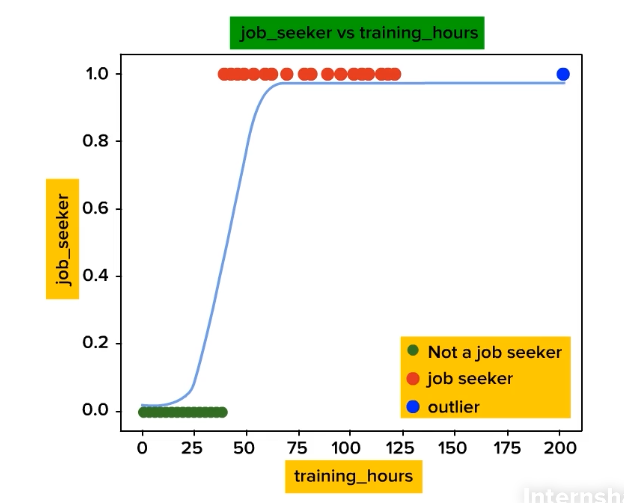

- Example:
    * Probability of 0.82 that the person with a given number of training hours is a job_seeker - Class 1
    * Logistic Regression in sklearn automatically converts the probabilities into classes by itself using 0.50 as threshold.

- Q. So we have now learned how to draw a fancy looking shape on a plot instead of a straight line, but how do we know what to draw exactly?
    * Gradient Descent
        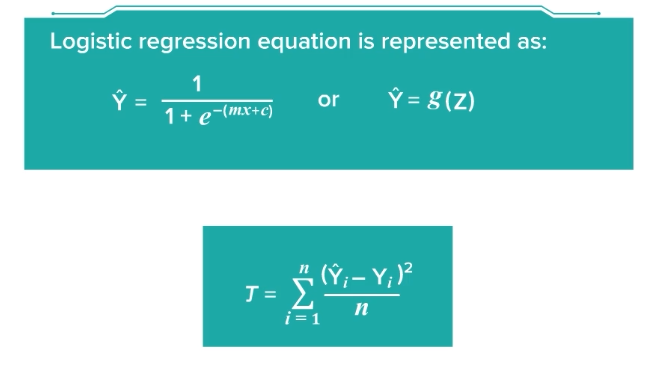

   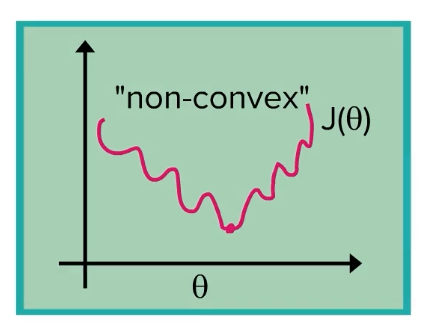

- Gradient Descent can only work with the convex function to find the ideal value of parameters
    * In logistic regression we are dealing with probabilities so we using differnt function called loss funciton or log loss
        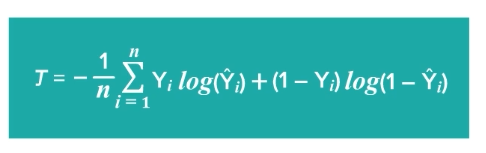
        * Where:
            * Y_hat = Predictied probability for class 1
            * Y     = Actual class
            * n     = Number of observations

- Will the change in loss function also change the gradients we obtained using the partial derivative?
    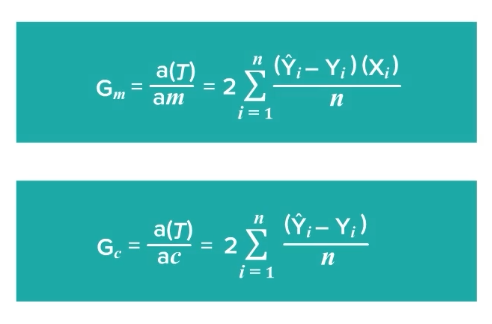
    * probability - Between 0 and 1
    * Middle point - 0.5 (Threshold)

- If probability > 0.50, the observation is regarded as class 1.
- If probability < 0.50, the observation is regarded as class 0.

# T2 V1
### Evaulation Metrics 1

- Confusion matrix
    * It is used to interpret the model predictions systematically
    * An n x n matrix, where 'n' represents the number of distinct classes in the target variable
    * But most of the probelm only contain two classes therefore:
        * 2 x 2 matrix
        * Class 1 - Positive Class
        * Class 2 - Negative Class
        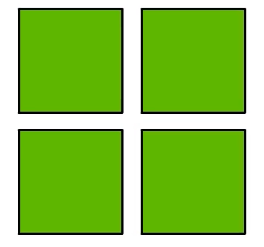

- Q. How does a confusion matrix help us?

- The basic platform of represntation of most of the classificaiton metrics
    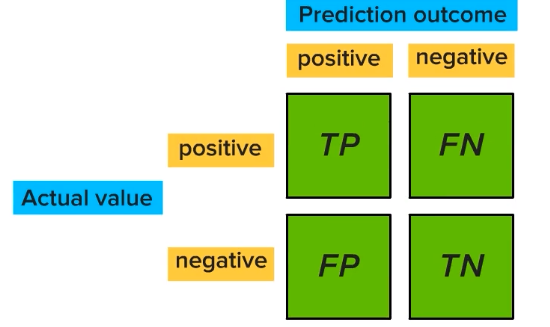

- The metrics which can be derived from the confusion matrix:
    * Accuracy
    * Precision
    * Recall

# T2 V2
### Evaulation Metrics 1 : Accuracy

Accuracy = Correct Predictions / Total Predictions = (TP + TN) / (FP + FN + TP + TN)

- Q. Higher Acccuracy = Better Model
    * The higher the accuracy, the better the model
    * In reality, Accuracy as an evaluation metric on unbalanced data doesn't give good results.

- Imbalanced Data:
    * A dataset which has disproportionate numbers of either positive or negative classes and both the classes arenot equally or nearly equally distributed.

# T2 V3
### Evaulation Metrics 1 : Precision and Recall

- Precision and Recall handle the imbalanced dataset efficiently

#### Precision
- Precision = Predictions Actually Positive / Total Predicted Positive = (TP) /(TP + FP)
- It is used when avoiding false positives is more essential than encountering false negatives

#### Recall
- Recall = Predictions Actually Positive / Total Actual Positive = (TP) / (TP + FN)
- It is used when avoiding fasle negatives is prioritized over encountering false positve

   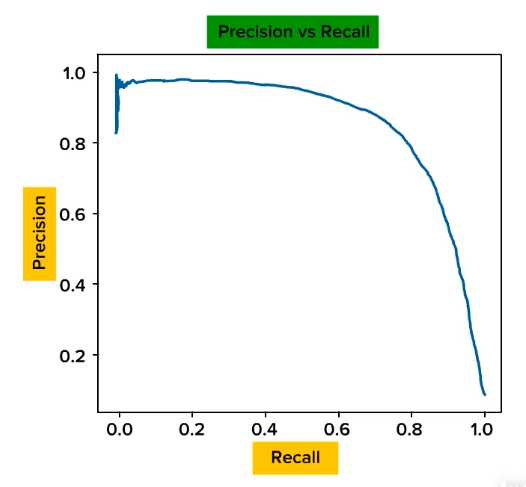

### F1 Score (Harmonic Mean)
   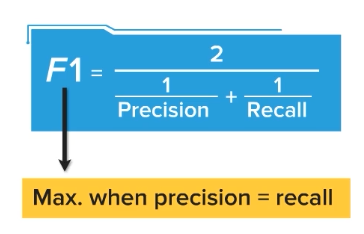

- Q. If precision, recall, f1 score yield the same result, thenhow do we distinguish which one is better?
    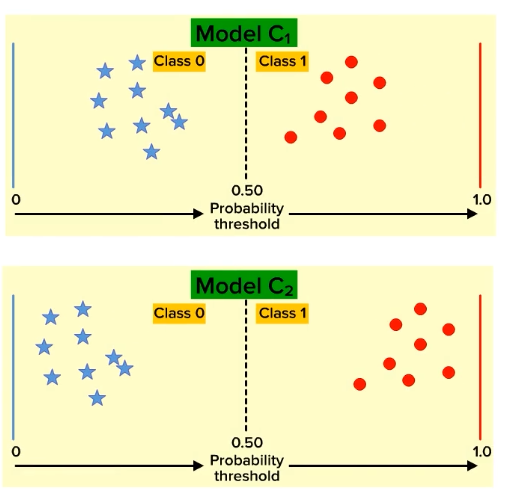
    

- Log Loss
    * The cost function of the logistic regression

# T2 V4
### Evaluation Metrics and the Log Loss Model

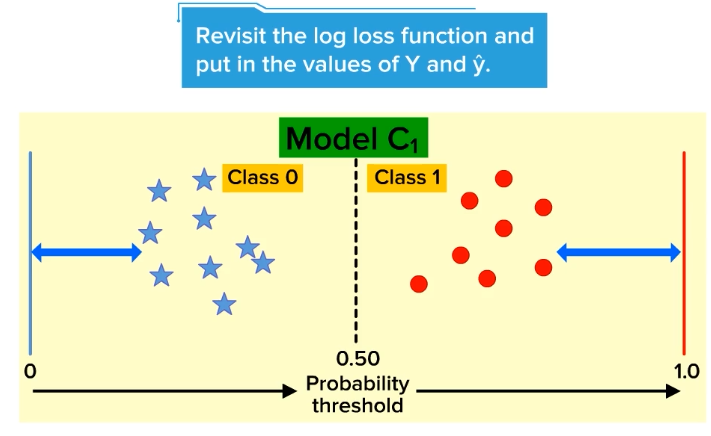

- Farther a predicted probability is from its true class, higher is the log loss function

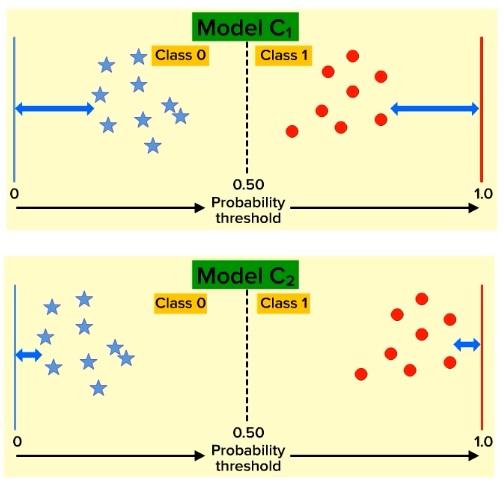
- The log loss of model C2 is lower thant the model C1
- The log loss itself can help us distinguish between the apparent identical models
- The model C2 is more confident in its predictions as compared to the model C1

# T2 V5
### The AUC - ROC Curve

- AUC - ROC curve is a performance measurement for classification problems at various thresholds settings.
- AUC : Area Under Curve
- ROC : Receiver Operating Characteristics
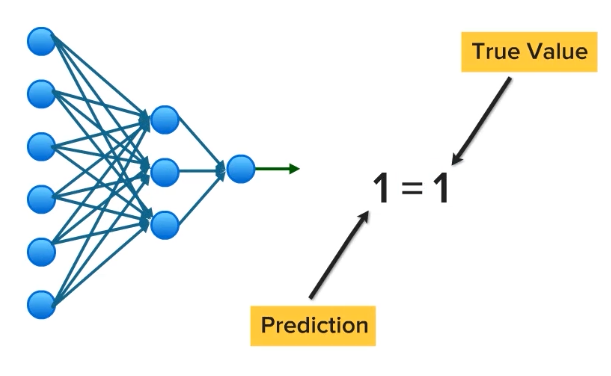

- Higher the AUC, the better the model is distinguishing between 0 and 1

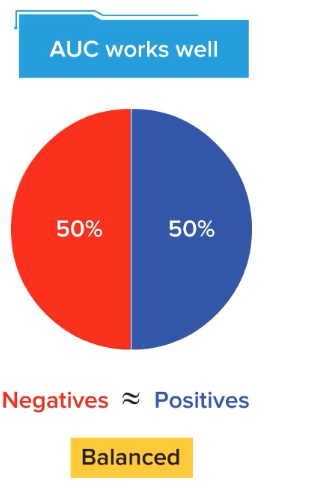

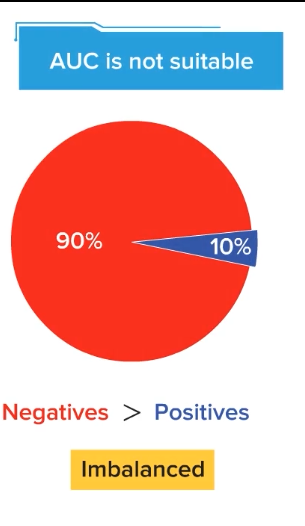

- The Graph is prepared by calculatinng values of FPR & TPR at different threshold values
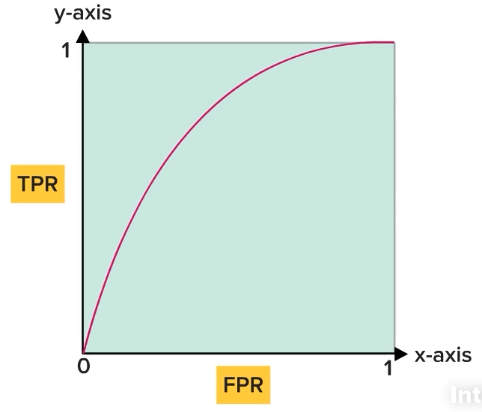

- FPR : False Positive Rate, = FP / (TN + FP)
- TPR : True Positve Rate, = TP / (TP + FN)

- FPR and TPR values are between the 0 and 1

- How is AUC - ROC calculated
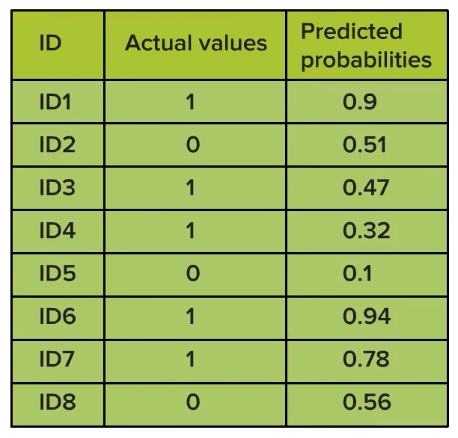
    * Trying all values between 0 and 1 as a threshold is not practical

- First Step: Arrange the predicted probabilities in descending order.
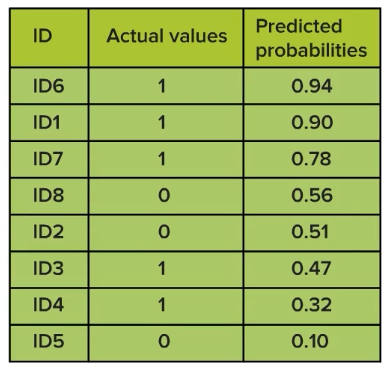

- Second Step : Take the first value as a threshold and the classes are predicted based on this threshold
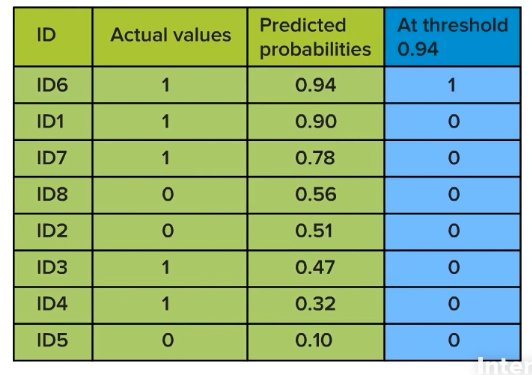

- Third Step: Calculate the TPR and FPR values
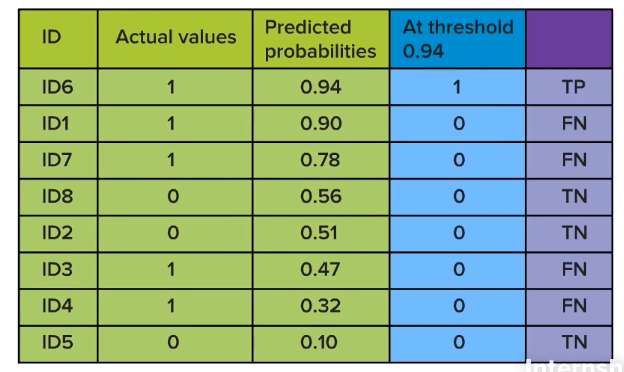

- The area under this curve can be used to determine the performance of the model
- The higher the AUC - ROC, better is the performance of the model
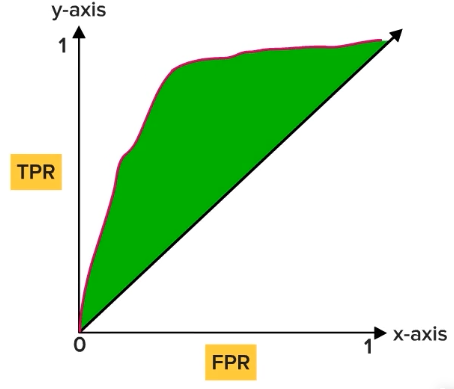
    * Note: If the AUC - ROC is >0.95, there could be something wrong with the model or the dataset.

# T3 V1
### Implementing Logistic Regression Part 1

- Data Dictionary : 
    * A centralized repository of information about data such as meaning, relationships to other data, origin usage and format.

#### Data Dictionary
- There are multiple variables in the dataset which can be ceanly divided in 3 categories

#### Demographic Information about Customers
- customer_id
- vintage : Vintage of the customer with the bank in number of days
- age : Age of customer
- gender : Gender of customer
- dependent : Number of dependents
- occupation : Occupation of the customer
- city : City of cusomer (anonymised)

#### Customer Bank Relationship
- customer_nw_category : Net worth of customer (3: low, 2: medium, 1: high)
- branch_code : Branch Code for customer account
- days_since_last_transaction : No of days since last credit in last year

#### Transactional Information
- current_balance : Balance as of today
- previous_month_end_balance : End of Month Balance of previous month
- average_monthly_balance_preQ : Average monthly balances (AMB) in previous Quarter
- average_monthly_balance_preQ2 : Average monthly balances (AMB) in previous to previous Quarted
- current_month_credit
- previous_month_credit
- current_month_debit
- current_month_balance
- previous_month_balance
- churn

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use(['seaborn-bright', 'dark_background'])

#### Improting datasets

In [22]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [23]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
customer_id                       22067 non-null int64
vintage                           22067 non-null int64
age                               22067 non-null int64
gender                            22067 non-null int64
dependents                        22067 non-null float64
occupation                        22067 non-null int64
city                              22067 non-null float64
customer_nw_category              22067 non-null int64
branch_code                       22067 non-null int64
days_since_last_transaction       22067 non-null float64
current_balance                   22067 non-null float64
previous_month_end_balance        22067 non-null float64
average_monthly_balance_prevQ     22067 non-null float64
average_monthly_balance_prevQ2    22067 non-null float64
current_month_credit              22067 non-null float64
previous_month_credit             22067 non-null f

#### Logistic regression will focus more on classifying the majority class  0
- The majority of the error is introduced in teh model due to the class 0
- The model will ignore the minority clas 1 incurring less error

In [24]:
# checking the dataset distributiona
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [25]:
x = data.drop(columns = ['churn', 'customer_id'])
y = data['churn']

In [26]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [29]:
# splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_x, y, train_size = 0.80, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

#### Model Building, Predictions and odds ratio

In [30]:
from sklearn.linear_model import LogisticRegression as LR
# class_weight = balanced -::- To emphasize the classes depending upon the number of obersvations presend in the data
# By adding balanced weight this will add a multiplier to the mionrity class 1
# Whenever the class 1 instance is misclassified, The erro incurred is multiplied
classifier = LR(class_weight = 'balanced')

In [32]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test) ## predicting clas
predicted_probabilities = classifier.predict_proba(x_test)  ## predicting probabilites

In [33]:
predicted_values

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [35]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.5490666 , 0.4509334 ],
        [0.40194134, 0.59805866],
        [0.57517068, 0.42482932],
        ...,
        [0.18954407, 0.81045593],
        [0.37020124, 0.62979876],
        [0.56786675, 0.43213325]]), (4414, 2))

# T3 V2
### Implementing Logistic Regression Part 2

In [40]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2652,  907],
       [ 315,  540]], dtype=int64)

#### Accuracy

In [41]:
classifier.score(x_test, y_test)

0.7231536021748981

#### Precision

In [42]:
# caculating the precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, predicted_values)
precision

0.37318590186592954

#### Recall

In [43]:
# calculating recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, predicted_values)
recall

0.631578947368421

#### F1 Score

In [44]:
# manually calculating the f1 score
f1 = 2/((1/precision) + (1/recall))
f1

0.4691572545612511

In [46]:
# calculating the f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted_values)
f1

0.46915725456125107

- Q. What is support
    * Support is nothing but the number of instances for the class 1 and class 0

In [47]:
# calculating precision, recall, f1_score, and support at once
from sklearn.metrics import precision_recall_fscore_support as prf_summary
precision, recall, f1, support = prf_summary(y_test, predicted_values)

- The support precision_recall_fscore_support function returns the metrics with respect to both of the classes
- The support function quickly clacluates the evaluation metrics for any classification model
- But thee representation of these metrics is not very intuitive

In [48]:
precision

array([0.89383215, 0.3731859 ])

In [49]:
recall

array([0.74515313, 0.63157895])

In [50]:
f1

array([0.812749  , 0.46915725])

- This function is only meant for representation purpose only

In [53]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      3559
           1       0.37      0.63      0.47       855

    accuracy                           0.72      4414
   macro avg       0.63      0.69      0.64      4414
weighted avg       0.79      0.72      0.75      4414



#### Precision - Recall Curve
- It calculates the precision and recall for every threshold possible between the probabilities 0 and 1

In [55]:
# gathering precision/recall score for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:, 1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4415,), (4415,), (4414,))

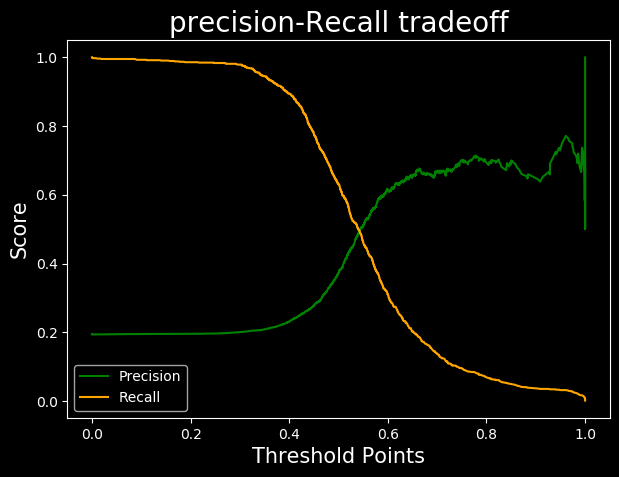

In [57]:
plt.figure(figsize = (7, 5), dpi = 100)
plt.plot(threshold_points, precision_points[:-1], color = 'green', label = 'Precision')
plt.plot(threshold_points, recall_points[:-1], color = 'orange', label = 'Recall')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('precision-Recall tradeoff', fontsize = 20)
plt.legend()

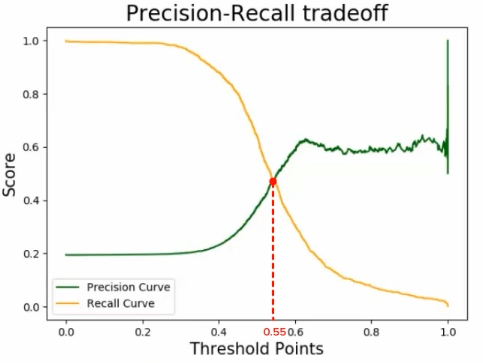

# T3 V3

### AUC - ROC Curve

- roc_curve : It returns a list of FPR and TPR values for different valeus of the probability thresholds

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:, 1])

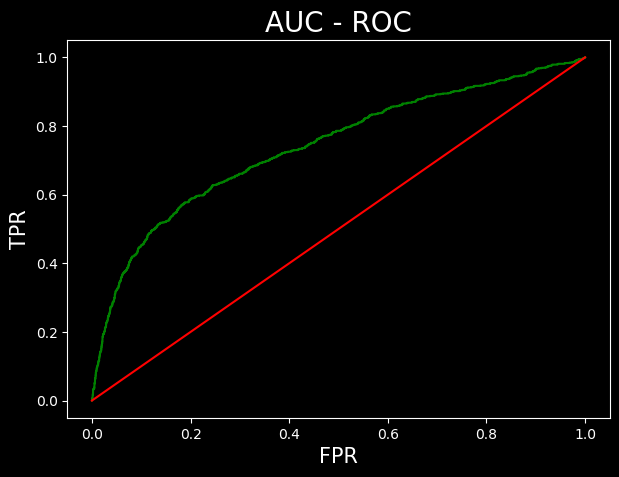

0.7403344457425289

In [61]:
plt.figure(figsize = (7, 5), dpi = 100)
plt.plot(fpr, tpr, color = 'green')
plt.plot([0, 1], [0, 1], label='baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC - ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:, 1])

#### Coefficient Plot

In [62]:
# arranging the data
c = classifier.coef_.reshape(-1)
x = x.columns

coeff_plot = pd.DataFrame({'coefficients': c,
                          'variable': x
                          })

# Sorting the values'
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-2.087182,current_balance
13,-0.181020,current_month_credit
0,-0.164717,vintage
14,-0.162785,previous_month_credit
8,-0.133542,days_since_last_transaction


Text(0.5, 1.0, 'Coefficient Plot')

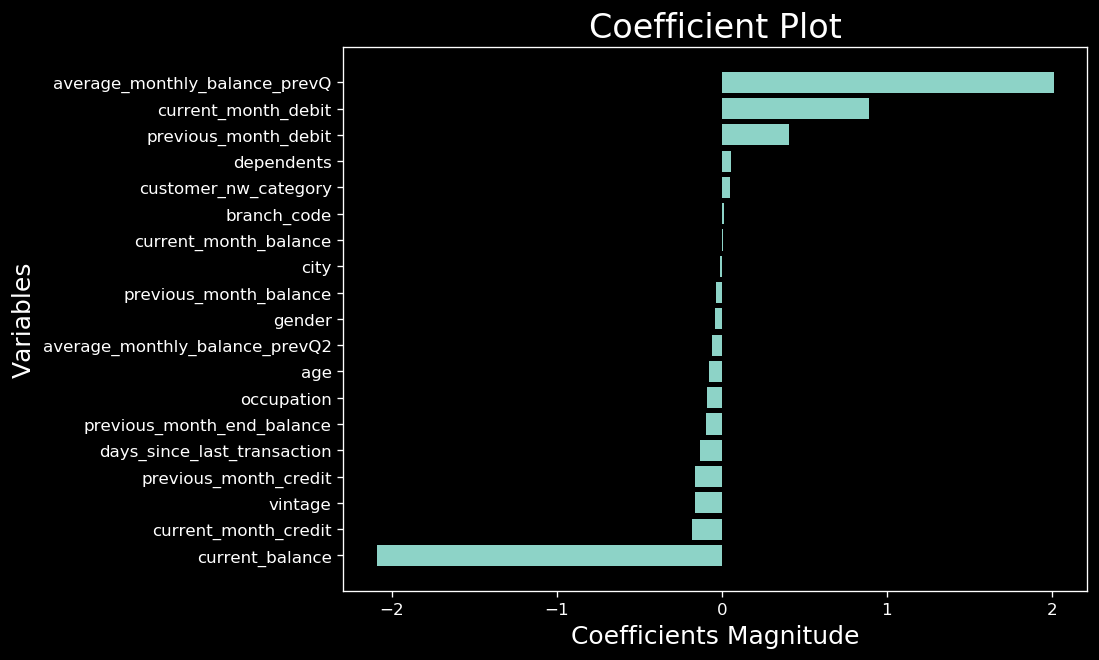

In [63]:
plt.figure(figsize = (8,6), dpi = 120)
plt.barh(coeff_plot['variable'], coeff_plot['coefficients'])
plt.xlabel('Coefficients Magnitude', fontsize =15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient Plot', fontsize =20)